In [660]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [661]:
# data source : https://www.kaggle.com/datasets/shree1992/housedata
df1 = pd.read_csv('archive (1)/data.csv')
df1.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Explore the data

In [662]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [663]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [664]:
df1.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [665]:
df1.shape

(4600, 18)

In [666]:
df1['date'].nunique()

70

In [667]:
df1['country'].nunique() 

1

In [668]:
df1['date'] = pd.to_datetime(df1['date'])
df1['age'] = df1['date'].dt.year - df1['yr_built']

# Total rooms (sum of bedrooms and bathrooms)
df1['total_rooms'] = df1['bedrooms'] + df1['bathrooms']

# Total square footage (sum of sqft_living, sqft_above, and sqft_basement)
df1['total_sqft'] = df1['sqft_living'] + df1['sqft_above'] + df1['sqft_basement']

# Renovation status (binary feature)
df1['renovated'] = df1['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Location information (combining city and statezip)
df1['location'] = df1['city'] + ', ' + df1['statezip']

In [669]:
# Select relevant columns to minimize the dataset
minimized_df = df1[['date', 'price', 'age', 'total_rooms', 'total_sqft', 'floors', 'waterfront', 'view', 'condition', 'renovated', 'location']]

In [670]:
minimized_df.head(5)

,date,price,age,total_rooms,total_sqft,floors,waterfront,view,condition,renovated,location
0,2014-05-02,313000.0,59,4.50,2680,1.5,0,0,3,1,"Shoreline, WA 98133"
1,2014-05-02,2384000.0,93,7.50,7300,2.0,0,4,5,0,"Seattle, WA 98119"
2,2014-05-02,342000.0,48,5.00,3860,1.0,0,0,4,0,"Kent, WA 98042"
3,2014-05-02,420000.0,51,5.25,4000,1.0,0,0,4,0,"Bellevue, WA 98008"
4,2014-05-02,550000.0,38,6.50,3880,1.0,0,0,4,1,"Redmond, WA 98052"


In [671]:
minimized_df.dtypes 

date           datetime64[ns]
price                 float64
age                     int64
total_rooms           float64
total_sqft              int64
floors                float64
waterfront              int64
view                    int64
condition               int64
renovated               int64
location               object
dtype: object

# Data Preprocessing

 # remove outlayer

In [672]:
# Round and convert total_rooms', and 'floors' to integers
minimized_df['total_rooms'] = minimized_df['total_rooms'].round().astype(int)
minimized_df['floors'] = minimized_df['floors'].round().astype(int)

C:\Users\Hi\AppData\Local\Temp\ipykernel_8428\235275264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minimized_df['total_rooms'] = minimized_df['total_rooms'].round().astype(int)
C:\Users\Hi\AppData\Local\Temp\ipykernel_8428\235275264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minimized_df['floors'] = minimized_df['floors'].round().astype(int)


In [673]:
print(minimized_df.dtypes)

date           datetime64[ns]
price                 float64
age                     int64
total_rooms             int32
total_sqft              int64
floors                  int32
waterfront              int64
view                    int64
condition               int64
renovated               int64
location               object
dtype: object


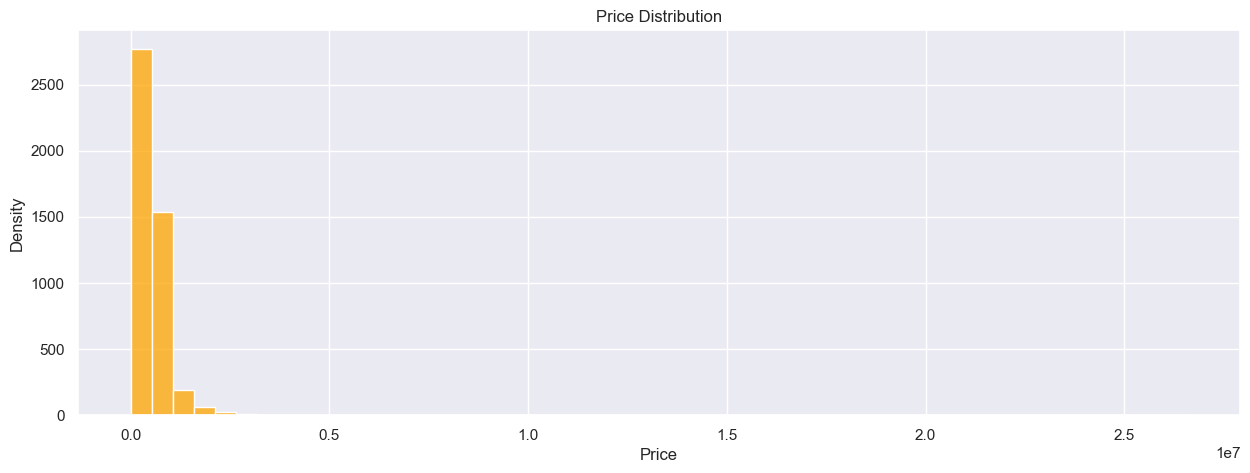

In [674]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,5)
sns.histplot(minimized_df["price"], bins=50,color="orange")
plt.title("Price Distribution")
plt.ylabel("Density")
plt.xlabel("Price");
sns.set(color_codes=True)

In [675]:
columns = ['price', 'age', 'total_rooms', 'total_sqft', 'floors', 'waterfront', 'view','condition','renovated']

for column in columns:
    min_value = minimized_df[column].min()
    print(f"Minimum {column}: {min_value}")


Minimum price: 0.0
Minimum age: 0
Minimum total_rooms: 0
Minimum total_sqft: 740
Minimum floors: 1
Minimum waterfront: 0
Minimum view: 0
Minimum condition: 1
Minimum renovated: 0


In [676]:
def remove_outliers(df, columns):
    """
    Remove the bottom and top 10% of data in the specified columns.
    
    Parameters:
        df (DataFrame): Input DataFrame.
        columns (list): List of column names for which outliers are to be removed.
        
    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    filtered_df = minimized_df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    
    for column in columns:
        # Compute the 10th and 90th percentiles for the current column
        p10 = df[column].quantile(0.10)
        p90 = df[column].quantile(0.90)
        
        # Filter the DataFrame to include data only between the 10th and 90th percentiles for the current column
        filtered_df = filtered_df[(filtered_df[column] >= p10) & (filtered_df[column] <= p90)]
    
    return filtered_df




In [677]:
# Remove outliers from the 'price' and 'age' columns
filtered_df = remove_outliers(minimized_df, ['price'])
df2 = filtered_df

In [678]:
columns = ['price', 'age', 'total_rooms', 'total_sqft', 'floors', 'waterfront', 'view','condition','renovated']

for column in columns:
    min_value = df2[column].min()
    print(f"Minimum {column}: {min_value}")


Minimum price: 239950.0
Minimum age: 0
Minimum total_rooms: 2
Minimum total_sqft: 740
Minimum floors: 1
Minimum waterfront: 0
Minimum view: 0
Minimum condition: 1
Minimum renovated: 0


In [679]:
df2.shape

(3683, 11)

In [680]:
df2.isna().sum()

date           0
price          0
age            0
total_rooms    0
total_sqft     0
floors         0
waterfront     0
view           0
condition      0
renovated      0
location       0
dtype: int64

In [681]:
df2.duplicated().sum()

0

In [682]:
df2 = df2.drop_duplicates()

In [683]:
df2.duplicated().sum()

0

In [684]:
df2.head(5)

,date,price,age,total_rooms,total_sqft,floors,waterfront,view,condition,renovated,location
0,2014-05-02,313000.0,59,4,2680,2,0,0,3,1,"Shoreline, WA 98133"
2,2014-05-02,342000.0,48,5,3860,1,0,0,4,0,"Kent, WA 98042"
3,2014-05-02,420000.0,51,5,4000,1,0,0,4,0,"Bellevue, WA 98008"
4,2014-05-02,550000.0,38,6,3880,1,0,0,4,1,"Redmond, WA 98052"
5,2014-05-02,490000.0,76,3,1760,1,0,0,3,1,"Seattle, WA 98115"


In [685]:
# checking the data impalance

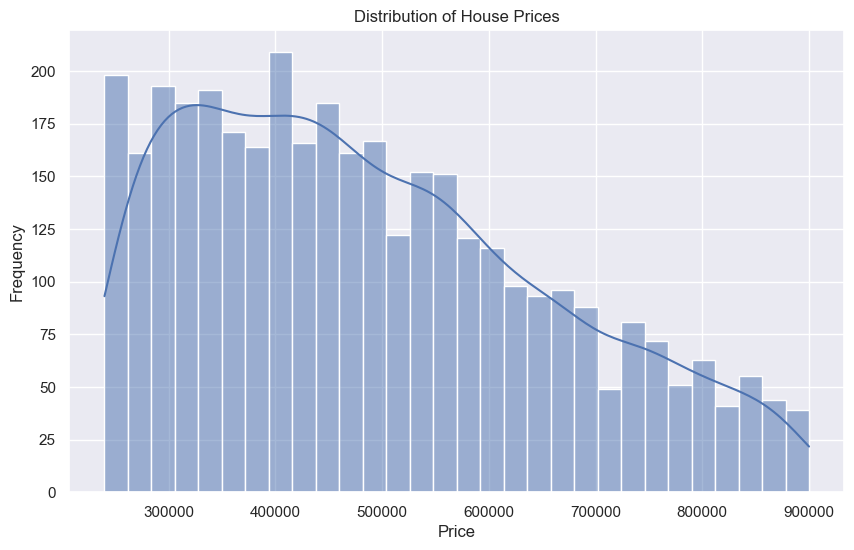

In [686]:
# Plot the distribution of house prices using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df2['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

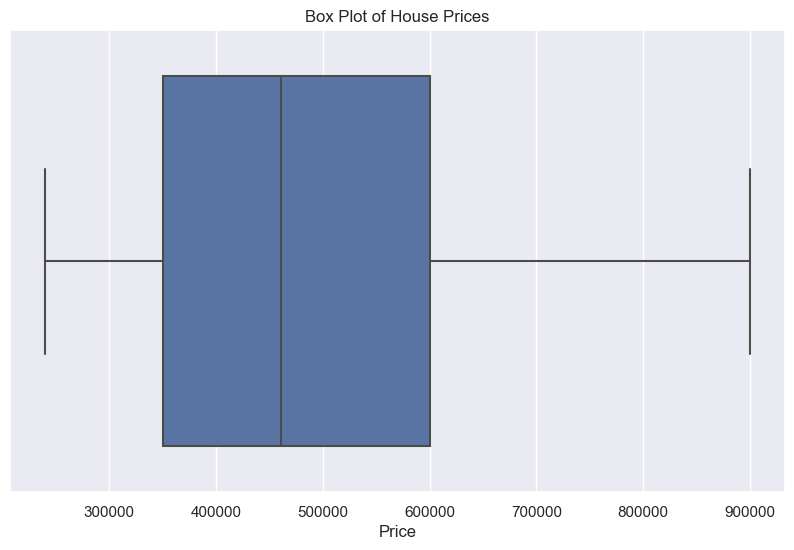

In [687]:
# Plot the spread of house prices using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['price'])
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()

In [688]:
from scipy.stats import skew, kurtosis

In [689]:
# Calculate skewness and kurtosis
price_skewness = skew(df['price'])
price_kurtosis = kurtosis(df['price'])

print(f"Skewness of price: {price_skewness}")
print(f"Kurtosis of price: {price_kurtosis}")

Skewness of price: 0.5247061867265506
Kurtosis of price: -0.6335720903714623


In [690]:
# Apply log transformation to the 'price' column
df2['log_price'] = np.log(df2['price'])

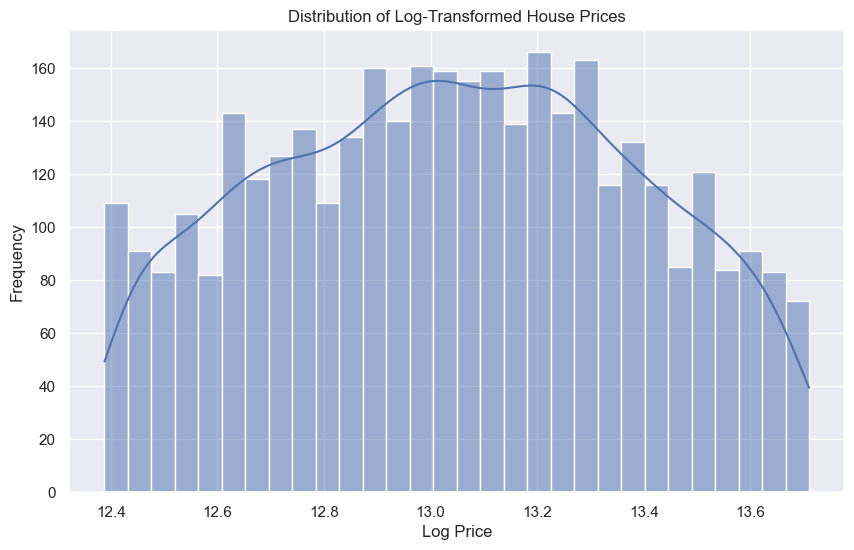

In [691]:
# Plot the distribution of the transformed house prices using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df2['log_price'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()


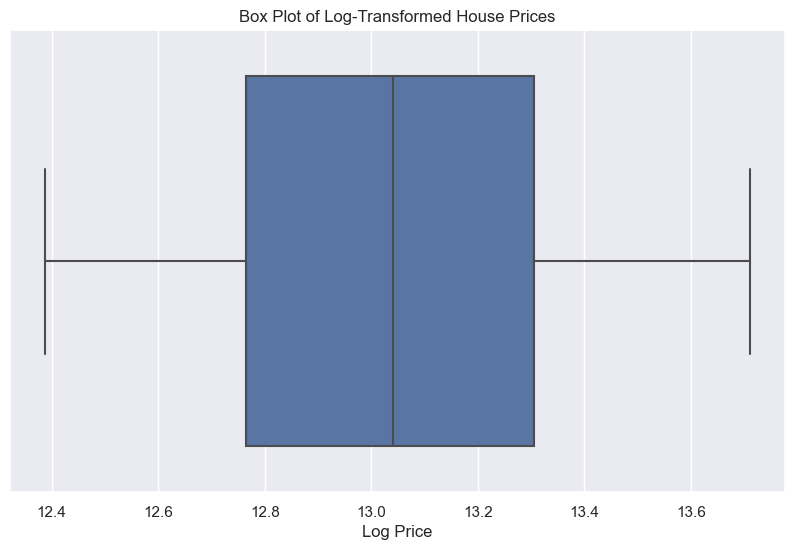

In [692]:
# Plot the spread of the transformed house prices using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['log_price'])
plt.title('Box Plot of Log-Transformed House Prices')
plt.xlabel('Log Price')
plt.show()


In [693]:
# Calculate skewness and kurtosis of the transformed data
log_price_skewness = skew(df2['log_price'])
log_price_kurtosis = kurtosis(df2['log_price'])

print(f"Skewness of log-transformed price: {log_price_skewness}")
print(f"Kurtosis of log-transformed price: {log_price_kurtosis}")

Skewness of log-transformed price: -0.011786001276174261
Kurtosis of log-transformed price: -0.9703122732699496


In [694]:
df2

,date,price,age,total_rooms,total_sqft,floors,waterfront,view,condition,renovated,location,log_price
0,2014-05-02,313000.000000,59,4,2680,2,0,0,3,1,"Shoreline, WA 98133",12.653958
2,2014-05-02,342000.000000,48,5,3860,1,0,0,4,0,"Kent, WA 98042",12.742566
3,2014-05-02,420000.000000,51,5,4000,1,0,0,4,0,"Bellevue, WA 98008",12.948010
4,2014-05-02,550000.000000,38,6,3880,1,0,0,4,1,"Redmond, WA 98052",13.217674
5,2014-05-02,490000.000000,76,3,1760,1,0,0,3,1,"Seattle, WA 98115",13.102161
...,...,...,...,...,...,...,...,...,...,...,...,...
4592,2014-07-08,252980.000000,21,6,5060,2,0,0,3,0,"Federal Way, WA 98003",12.441066
4593,2014-07-08,289373.307692,1,6,5076,2,0,0,3,1,"Auburn, WA 98092",12.575473
4595,2014-07-09,308166.666667,60,5,3020,1,0,0,4,1,"Seattle, WA 98133",12.638396
4596,2014-07-09,534333.333333,31,6,2920,2,0,0,3,1,"Bellevue, WA 98007",13.188775


# split the numerical and categorical values  

In [695]:
def quan_qual(df):

    quantitative = []
    qualitative = []
    
    for col_name in df.columns:
        
        if df[col_name].dtype == 'O':
            qualitative.append(col_name) 
        else:
            quantitative.append(col_name)
            
    return quantitative, qualitative

In [696]:
quantitative, qualitative = quan_qual(df2)

In [697]:
quantitative

['date',
 'price',
 'age',
 'total_rooms',
 'total_sqft',
 'floors',
 'waterfront',
 'view',
 'condition',
 'renovated',
 'log_price']

In [698]:
qualitative

['location']

In [699]:
data = df2.copy()

In [700]:
# Convert 'date' to ordinal
data['date'] = data['date'].apply(lambda x: x.toordinal())

In [701]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in qualitative:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [702]:
data.dtypes

date             int64
price          float64
age              int64
total_rooms      int32
total_sqft       int64
floors           int32
waterfront       int64
view             int64
condition        int64
renovated        int64
location         int32
log_price      float64
dtype: object

In [703]:
data.head(3)

,date,price,age,total_rooms,total_sqft,floors,waterfront,view,condition,renovated,location,log_price
0,735355,313000.0,59,4,2680,2,0,0,3,1,87,12.653958
2,735355,342000.0,48,5,3860,1,0,0,4,0,35,12.742566
3,735355,420000.0,51,5,4000,1,0,0,4,0,9,12.948010


In [704]:
data.shape

(3683, 12)

<Axes: >

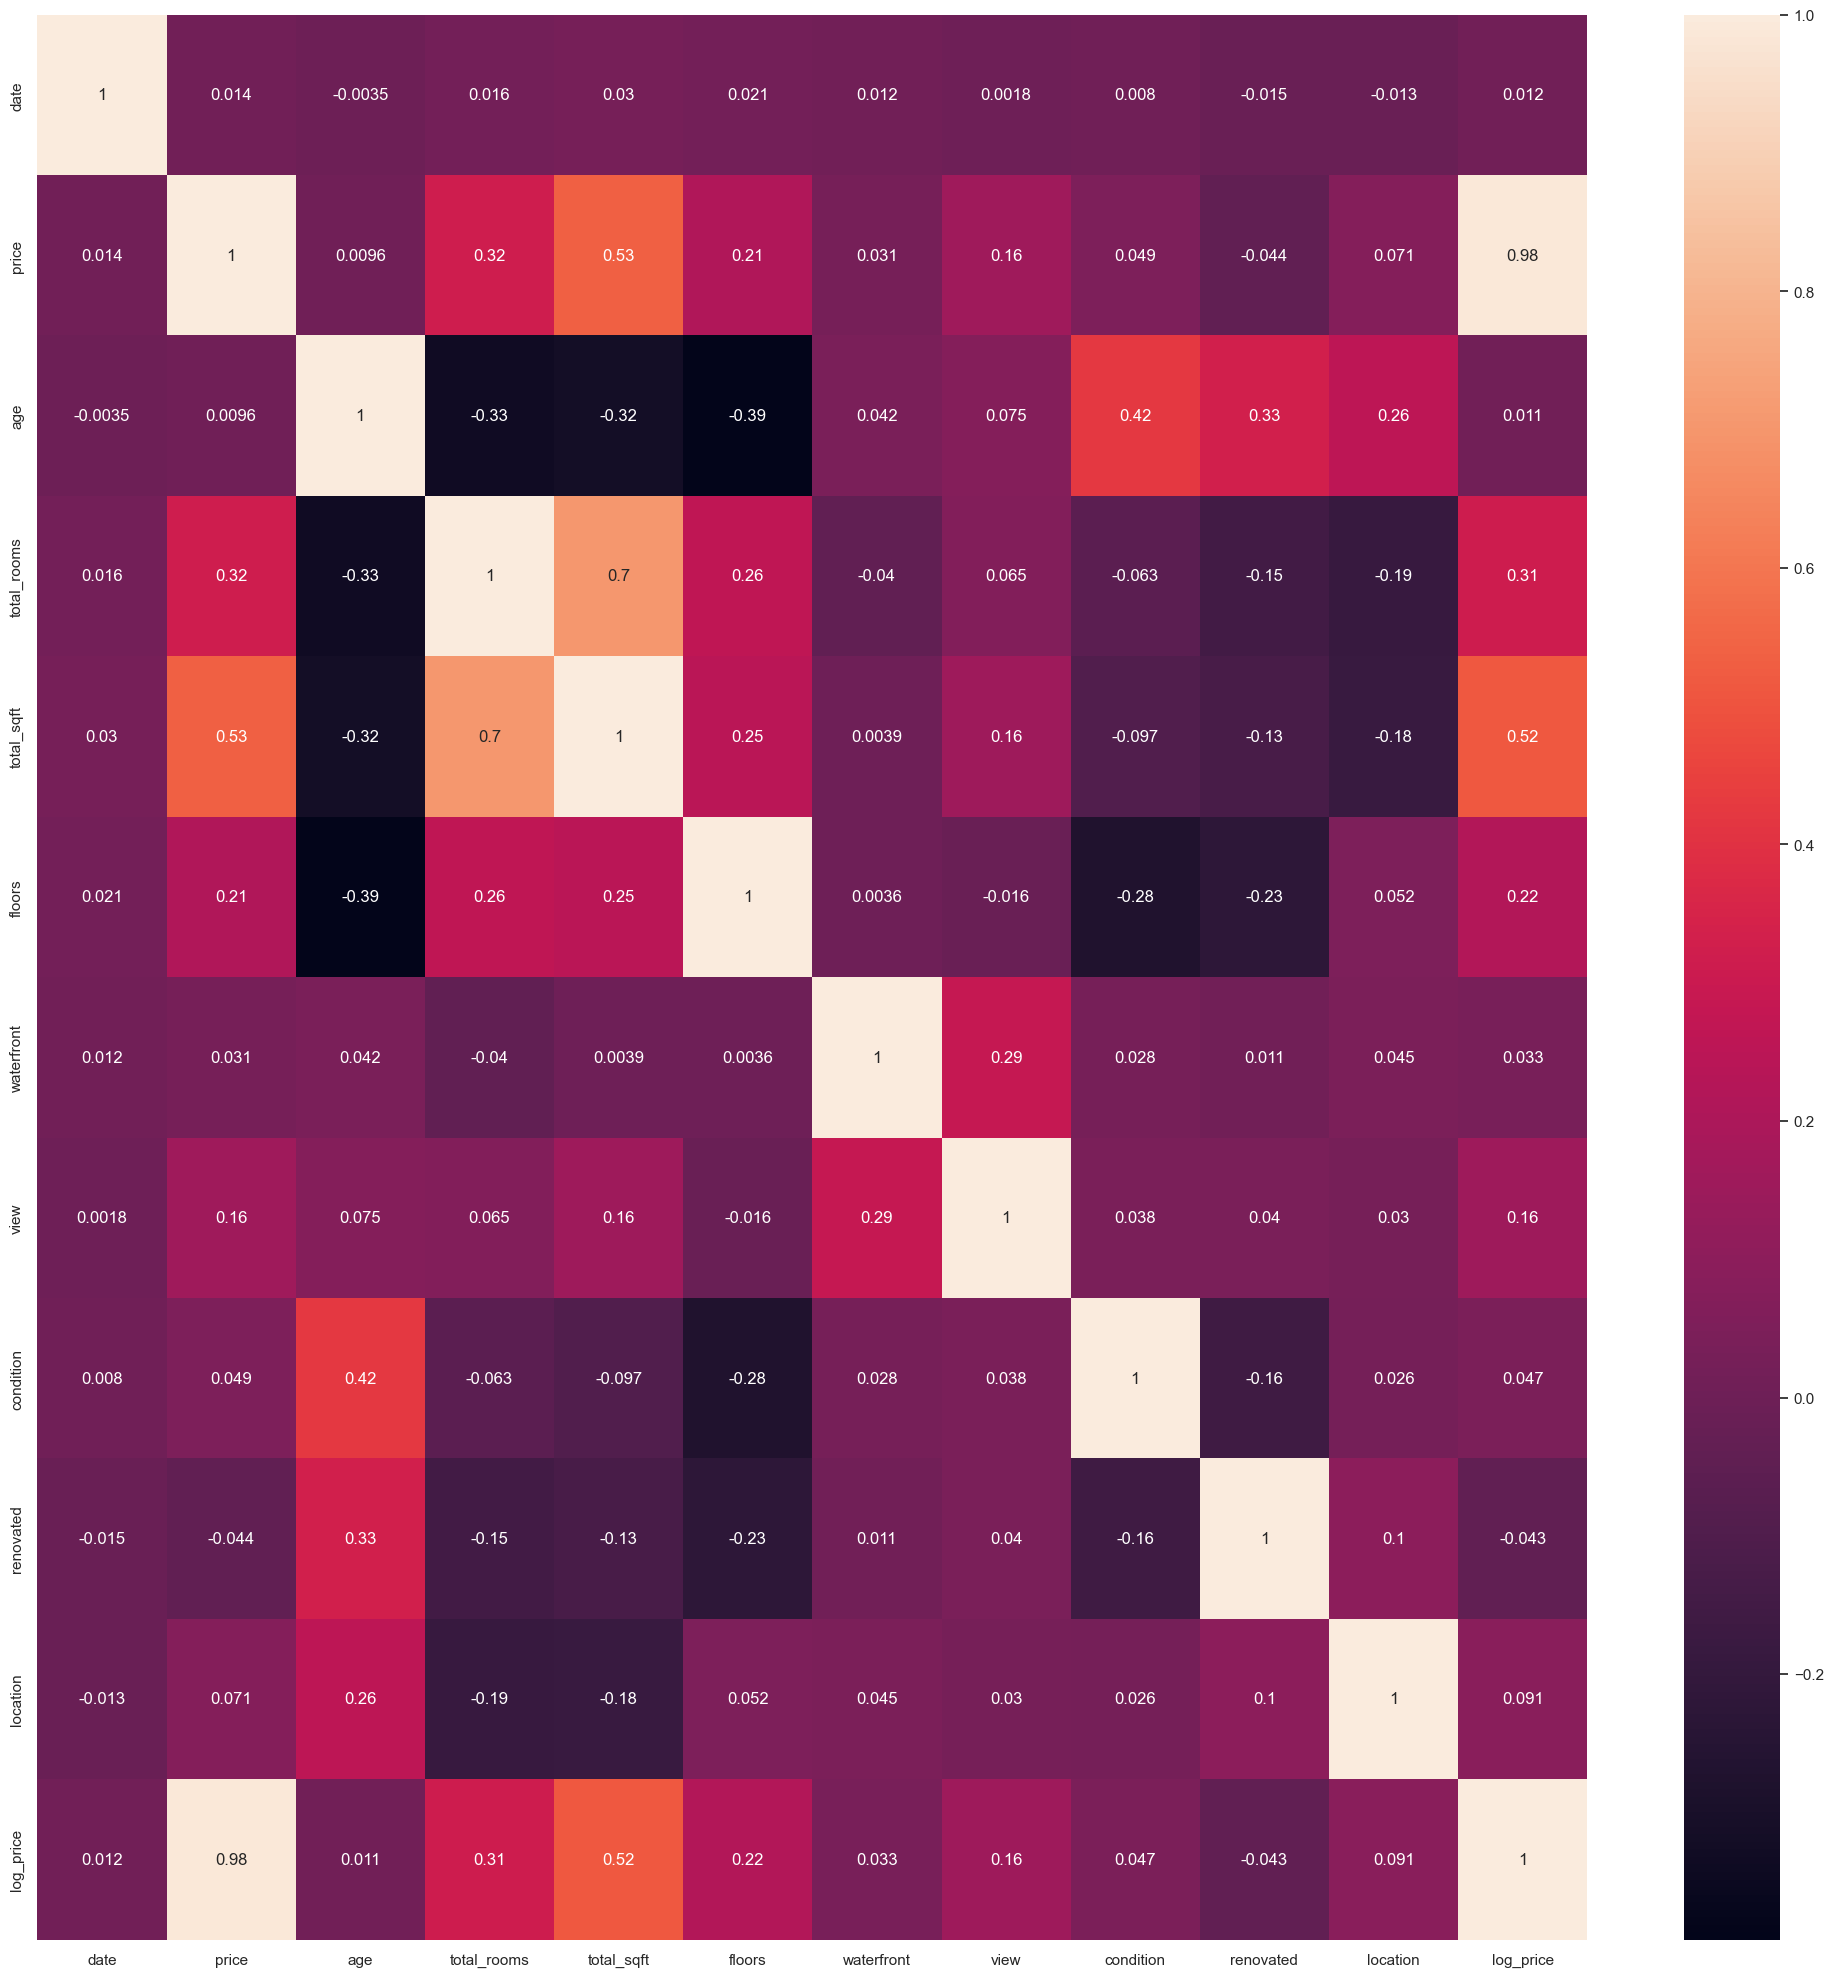

In [705]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,ax=ax)

In [706]:
independent = data[['date','age','total_rooms','total_sqft','floors','waterfront','view','condition','renovated','location']]
dependent = data[['log_price']]

In [707]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# Create the ExtraTreesRegressor model
model = ExtraTreesRegressor()

# Fit the model on your data
model.fit(independent, dependent)

# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
for i, index in enumerate(sorted_indices):
    print(f"{i + 1}. Feature: {independent.columns[index]} - Importance: {importances[index]}")

F:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1. Feature: total_sqft - Importance: 0.3329089055710307
2. Feature: location - Importance: 0.2724328613911105
3. Feature: age - Importance: 0.12029998988016948
4. Feature: date - Importance: 0.07227472432932514
5. Feature: total_rooms - Importance: 0.07030918266426979
6. Feature: condition - Importance: 0.03939512973057449
7. Feature: floors - Importance: 0.039360617003727096
8. Feature: renovated - Importance: 0.0269381218373158
9. Feature: view - Importance: 0.025316563284145374
10. Feature: waterfront - Importance: 0.0007639043083316664


In [708]:
select_dataFrame=data[['total_sqft','age','date','location','total_rooms','condition','view','floors','renovated','log_price']]
select_dataFrame.head(3)

,total_sqft,age,date,location,total_rooms,condition,view,floors,renovated,log_price
0,2680,59,735355,87,4,3,0,2,1,12.653958
2,3860,48,735355,35,5,4,0,1,0,12.742566
3,4000,51,735355,9,5,4,0,1,0,12.948010


In [709]:
select_price=data[['total_sqft','age','date','location','total_rooms','condition','view','floors','renovated','log_price','price']]
select_price.head(3)

,total_sqft,age,date,location,total_rooms,condition,view,floors,renovated,log_price,price
0,2680,59,735355,87,4,3,0,2,1,12.653958,313000.0
2,3860,48,735355,35,5,4,0,1,0,12.742566,342000.0
3,4000,51,735355,9,5,4,0,1,0,12.948010,420000.0


In [710]:
select_dataFrame.dtypes

total_sqft       int64
age              int64
date             int64
location         int32
total_rooms      int32
condition        int64
view             int64
floors           int32
renovated        int64
log_price      float64
dtype: object

# 4.Model Creation and Evaluation

In [711]:
select_df=df2[['total_sqft','age','date','location','total_rooms','condition','view','floors','renovated','log_price']]
select_df.head(3)

,total_sqft,age,date,location,total_rooms,condition,view,floors,renovated,log_price
0,2680,59,2014-05-02,"Shoreline, WA 98133",4,3,0,2,1,12.653958
2,3860,48,2014-05-02,"Kent, WA 98042",5,4,0,1,0,12.742566
3,4000,51,2014-05-02,"Bellevue, WA 98008",5,4,0,1,0,12.948010


In [712]:
# Convert 'date' to ordinal
select_df['date'] = select_df['date'].apply(lambda x: x.toordinal())

C:\Users\Hi\AppData\Local\Temp\ipykernel_8428\121849449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df['date'] = select_df['date'].apply(lambda x: x.toordinal())


In [713]:
select_df.head(3)

,total_sqft,age,date,location,total_rooms,condition,view,floors,renovated,log_price
0,2680,59,735355,"Shoreline, WA 98133",4,3,0,2,1,12.653958
2,3860,48,735355,"Kent, WA 98042",5,4,0,1,0,12.742566
3,4000,51,735355,"Bellevue, WA 98008",5,4,0,1,0,12.948010


In [714]:
def quan_qual(df):

    quantitative = []
    qualitative = []
    
    for col_name in df.columns:
        
        if df[col_name].dtype == 'O':
            qualitative.append(col_name) 
        else:
            quantitative.append(col_name)
            
    return quantitative, qualitative

In [715]:
quantitative, qualitative = quan_qual(select_df)

In [716]:
quantitative

['total_sqft',
 'age',
 'date',
 'total_rooms',
 'condition',
 'view',
 'floors',
 'renovated',
 'log_price']

In [717]:
qualitative

['location']

### Splitting the data

In [718]:
X = select_df.iloc[:, :-1]
y = select_df.iloc[:, -1]

In [719]:

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

## Converting Categorical to Numerical and Scaling the values

In [720]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define OneHotEncoder and StandardScaler
ohe = OneHotEncoder(drop='first', handle_unknown="ignore")
scaler = StandardScaler()

# Define ColumnTransformer to apply preprocessing steps to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', ohe, ['location']),  # Include 'merchant' for one-hot encoding
        ('StandardScaler', scaler, ['total_sqft',
 'age',
 'date',
 'total_rooms',
 'condition',
 'view',
 'floors',
 'renovated'])  # Scale numerical columns
    ],
    remainder='passthrough'  # Passthrough the remaining columns
)

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
X_train_dummy = preprocessing_pipeline.fit_transform(X_train)
X_test_dummy = preprocessing_pipeline.transform(X_test)


F:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [721]:
# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [722]:
# Define parameter grid for GridSearchCV
param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False],
    'model__n_jobs': [None, -1, 1],
    'model__positive': [True, False]
}

In [723]:
# Set up GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)


In [724]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


F:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\Anaconda\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "F:\Anaconda

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['location']),
                                                                        ('StandardScaler',
                                                                         StandardScaler(),
                                                                         ['total_sqft',
                                                                          'age',
                                                                          'date',
                                                                          'total_rooms',
                                                                          'condition',
                                                                          'view',
                                                                          'floors',
                                                                          'renovated'])])),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'model__copy_X': [True, False],
                         'model__fit_intercept': [True, False],
                         'model__n_jobs': [None, -1, 1],
                         'model__positive': [True, False]},
             scoring='r2', verbose=1)

In [725]:
# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [726]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

F:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [727]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [728]:
# Display results
print("Best parameters found:", best_params)
print("Best cross-validation R2 score:", best_score)
print("R2 score on test set:", r2)
print("Mean Absolute Error on test set:", mae)
print("Mean Squared Error on test set:", mse)

Best parameters found: {'model__copy_X': True, 'model__fit_intercept': True, 'model__n_jobs': None, 'model__positive': False}
Best cross-validation R2 score: 0.7267794354928435
R2 score on test set: 0.7202745327691779
Mean Absolute Error on test set: 0.12824228611039712
Mean Squared Error on test set: 0.03049804794719516


In [729]:
# New data for prediction
new_data = pd.DataFrame({
    'total_sqft': [2680],
    'age': [59],
    'date': [pd.to_datetime('2014-05-02').toordinal()],
    'location': ['Shoreline, WA 98133'],
    'total_rooms': [4],
    'condition': [3],
    'view': [0],
    'floors': [2],
    'renovated': [1]
})

In [730]:
# Preprocess new data
new_data_preprocessed = preprocessor.transform(new_data)

In [731]:
# Predict the log_price for the new data
new_log_price_pred = linear_model.predict(new_data_preprocessed)
new_price_pred = np.exp(new_log_price_pred)  # Convert prediction back to original scale
print(f'Predicted Price: {new_price_pred[0]}')

Predicted Price: 310604.3984028973


In [732]:
# import joblib

# # Save the model and the preprocessing pipeline
# joblib.dump(best_model, 'house_price_model.pkl')
# joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline.pkl')
